# DETECT SPAM E-MAILS USING NAIVE BAYES

## About the Dataset
- The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

- The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.


### IMPORTING DATA AND LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
spam_df = pd.read_csv('dataset\emails.csv')
spam_df.head(10)

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
5,"Subject: great nnews hello , welcome to medzo...",1
6,Subject: here ' s a hot play in motion homela...,1
7,Subject: save your money buy getting this thin...,1
8,Subject: undeliverable : home based business f...,1
9,Subject: save your money buy getting this thin...,1


In [3]:
spam_df.spam.value_counts()

spam
0    4360
1    1368
Name: count, dtype: int64

### DATA ANALYSIS

In [4]:
ham = spam_df[spam_df['spam'] == 0]
spam = spam_df[spam_df['spam'] == 1]

In [5]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [7]:
spam_df['length'] = spam_df['text'].apply(len)
spam_df.head()

,text,spam,length
0,Subject: naturally irresistible your corporate...,1,1484
1,Subject: the stock trading gunslinger fanny i...,1,598
2,Subject: unbelievable new homes made easy im ...,1,448
3,Subject: 4 color printing special request add...,1,500
4,"Subject: do not have money , get software cds ...",1,235


In [8]:
spam_percent = 100*len(spam)/len(spam_df)
ham_percent = 100*len(ham)/len(spam_df)

print('Spam Pecent : {}%'.format(round(spam_percent, 2)))
print('Ham Percent : {}%'.format(round(ham_percent, 2)))

Spam Pecent : 23.88%
Ham Percent : 76.12%


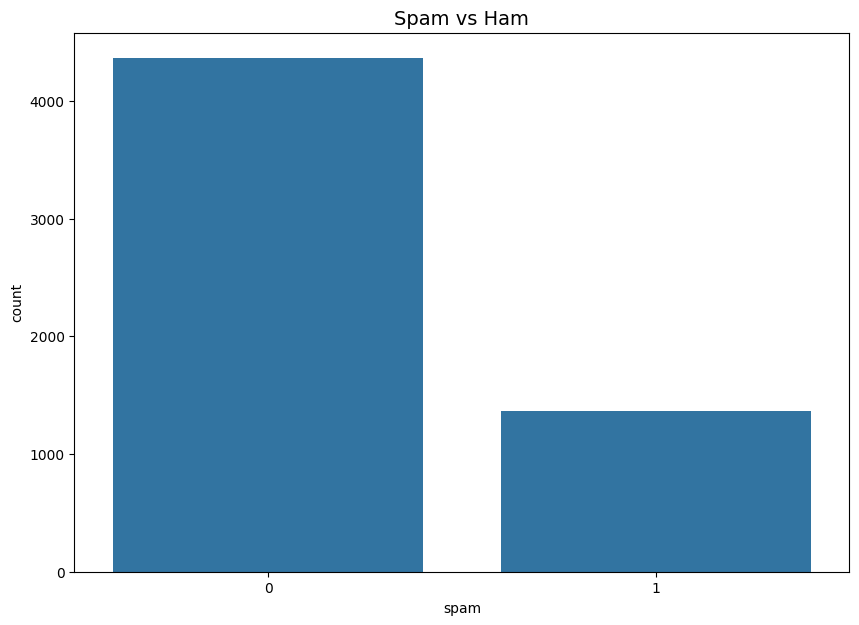

In [10]:
plt.figure(figsize=(10,7))
sns.countplot(x='spam', data=spam_df)
plt.title('Spam vs Ham', fontsize=14)
plt.show()


### DATA CLEANING

In [11]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [12]:
import string
from nltk.corpus import stopwords

stopwords.words('english')
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [13]:
# Removing puctuation, stopwords
def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation]
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [14]:
spam_df_clean = spam_df['text'].apply(message_cleaning)
print(spam_df_clean[0])

['Subject', 'naturally', 'irresistible', 'corporate', 'identity', 'lt', 'really', 'hard', 'recollect', 'company', 'market', 'full', 'suqgestions', 'information', 'isoverwhelminq', 'good', 'catchy', 'logo', 'stylish', 'statlonery', 'outstanding', 'website', 'make', 'task', 'much', 'easier', 'promise', 'havinq', 'ordered', 'iogo', 'company', 'automaticaily', 'become', 'world', 'ieader', 'isguite', 'ciear', 'without', 'good', 'products', 'effective', 'business', 'organization', 'practicable', 'aim', 'hotat', 'nowadays', 'market', 'promise', 'marketing', 'efforts', 'become', 'much', 'effective', 'list', 'clear', 'benefits', 'creativeness', 'hand', 'made', 'original', 'logos', 'specially', 'done', 'reflect', 'distinctive', 'company', 'image', 'convenience', 'logo', 'stationery', 'provided', 'formats', 'easy', 'use', 'content', 'management', 'system', 'letsyou', 'change', 'website', 'content', 'even', 'structure', 'promptness', 'see', 'logo', 'drafts', 'within', 'three', 'business', 'days', 

In [15]:
print(spam_df['text'][0])

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

In [16]:
print(spam_df['text'][0])

Subject: naturally irresistible your corporate identity  lt is really hard to recollect a company : the  market is full of suqgestions and the information isoverwhelminq ; but a good  catchy logo , stylish statlonery and outstanding website  will make the task much easier .  we do not promise that havinq ordered a iogo your  company will automaticaily become a world ieader : it isguite ciear that  without good products , effective business organization and practicable aim it  will be hotat nowadays market ; but we do promise that your marketing efforts  will become much more effective . here is the list of clear  benefits : creativeness : hand - made , original logos , specially done  to reflect your distinctive company image . convenience : logo and stationery  are provided in all formats ; easy - to - use content management system letsyou  change your website content and even its structure . promptness : you  will see logo drafts within three business days . affordability : your  mar

### COUNT VECTORIZER

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
sample_data = ['This is the first document',
              'And this document is the second document',
              'This one is the third']

In [19]:
sample_vectorizer = CountVectorizer()
x_transformed = sample_vectorizer.fit_transform(sample_data)
print(x_transformed.toarray())

## 2 --> there are 2 'documnet' in that sentence
## that's why they call it count vectorizer

[[0 1 1 1 0 0 1 0 1]
 [1 2 0 1 0 1 1 0 1]
 [0 0 0 1 1 0 1 1 1]]


In [21]:
print(sample_vectorizer.get_feature_names_out())


['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


### APPLYING COUNT VECTORIZER TO MAIL

In [22]:
# apply the analyzer we've previously defined
vectorizer = CountVectorizer(analyzer=message_cleaning)
spamham_cv = vectorizer.fit_transform(spam_df['text'])

In [24]:
print(vectorizer.get_feature_names_out())


['\x01' '\x02' '\x03' ... 'zzn' 'zzncacst' 'zzzz']


In [25]:
print(spamham_cv.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
## 5728 samples, 37303 words extracted
spamham_cv.shape

(5728, 37229)

### TRAINING MODEL

In [27]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
label = spam_df['spam'].values

In [30]:
NB_classifier = MultinomialNB()
NB_classifier.fit(spamham_cv, label)

MultinomialNB()

In [31]:
testing_sample = ['Free Money!!!',
                  'Hi Jane, Please let me know if you want to modify our project.']

test_sample_vectorizer = vectorizer.transform(testing_sample)


In [32]:
test_pred = NB_classifier.predict(test_sample_vectorizer)
test_pred

array([0, 0], dtype=int64)

In [33]:
testing_sample = ['Hello, I am Boo, I would like to book a hotel in Bali by January 24th',
                  'money vaigra!!']

test_sample_vectorizer = vectorizer.transform(testing_sample)

test_pred = NB_classifier.predict(test_sample_vectorizer)
test_pred

array([0, 1], dtype=int64)

### DIVIDING TRAIN TEST AND TRAINING

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

In [35]:
X = spamham_cv
y = label

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=7)

In [36]:
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

### EVALUATION

In [37]:
NB_classifier.score(X_train, y_train)

0.9973810563072893

In [38]:
NB_classifier.score(X_test, y_test)

0.9904013961605584

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

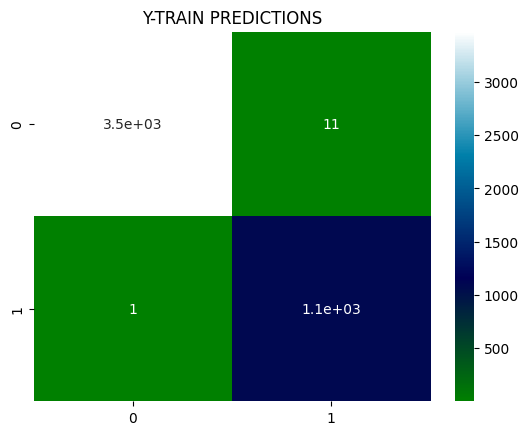

In [40]:
y_pred_train = NB_classifier.predict(X_train)
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, cmap='ocean')
plt.title('Y-TRAIN PREDICTIONS')
plt.show()

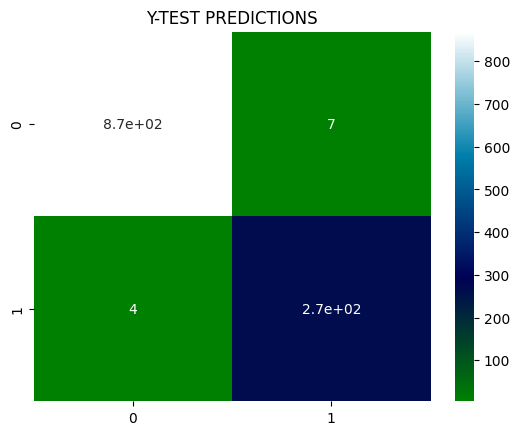

In [41]:
y_pred_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='ocean')
plt.title('Y-TEST PREDICTIONS')
plt.show()

In [42]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       876
           1       0.97      0.99      0.98       270

    accuracy                           0.99      1146
   macro avg       0.98      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146

